In [9]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [10]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from ModelComponents.spectroArchitectures import MLP_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.utils import plot_training_curves
from ModelComponents.validation import validate_and_evaluate

## Define validation arguments

In [11]:
datasets_path = "../../tp_tap_new/datasets"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")
label_path = os.path.join(preprocessed_path,"test")

results_path = "../results/MLP_spectro_v0"
checkpoint_path = os.path.join(results_path,"model.pth")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_CNN = MLP_spectro().to(device)
model_CNN.load_state_dict(torch.load(checkpoint_path))


criterion = nn.CrossEntropyLoss()


batch_size = 100
noise_prob_val = 0

data_val = FolderAudioDataset(os.path.join(preprocessed_path, "validation"), os.path.join(datasets_path, "bruits"), noise_prob=noise_prob_val)
val_loader = DataLoader(data_val, batch_size=batch_size, shuffle=False)

/home/morti/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


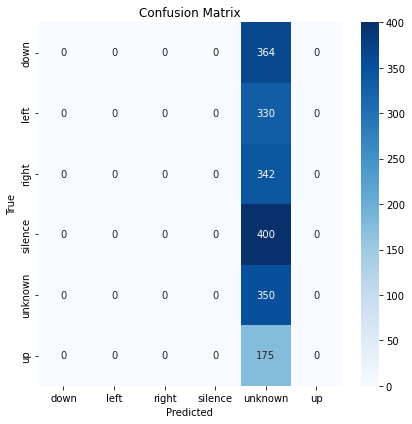

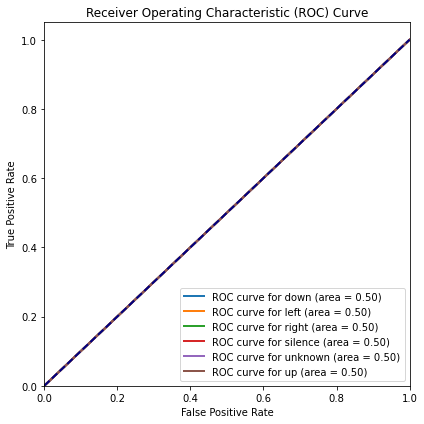

In [12]:
val_loss, val_accuracy, precision, recall, cm, fpr, tpr, roc_auc = validate_and_evaluate(model_CNN, val_loader, criterion, device, label_path, results_path, cnn=False)

In [13]:
val_loss

2.853840637207031

In [14]:
val_accuracy

17.848036715961243

In [15]:
precision

0.03185524146143006

In [16]:
recall

0.17848036715961244